In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from data import marshal_data, photometry_data, bran_disc, t_peak_mjd
from astropy.time import Time
import numpy as np
from astropy import constants as const

In [2]:
mjds = [Time(x, format="jd").mjd for x in marshal_data["jdobs"]]
marshal_data = marshal_data.assign(mjd=mjds)
print(marshal_data)

          # date         jdobs filter  absmag  magpsf  sigmamagpsf  limmag  \
0    2019 Apr 01  2.458575e+06      r   99.00   99.00        99.00   17.79   
1    2019 Apr 01  2.458575e+06      g   99.00   99.00        99.00   17.92   
2    2019 Apr 09  2.458583e+06      r  -17.86   18.88         0.14   20.02   
3    2019 Apr 09  2.458583e+06      r  -17.86   18.88         0.14   20.02   
4    2019 Apr 20  2.458594e+06      r  -18.44   18.30         0.09   19.24   
..           ...           ...    ...     ...     ...          ...     ...   
142  2019 Oct 10  2.458767e+06   UVW2  -17.58   19.16         0.14   22.09   
143  2019 Oct 15  2.458772e+06   UVW2  -17.38   19.36         0.10   22.60   
144  2019 Oct 20  2.458777e+06   UVW2  -17.41   19.33         0.13   22.32   
145  2019 Oct 30  2.458787e+06   UVW2  -17.39   19.35         0.17   21.87   
146  2019 Nov 05  2.458793e+06   UVW2  -16.95   19.79         0.19   22.09   

     instrument programid reducedby refsys  issub  isdiffpos   

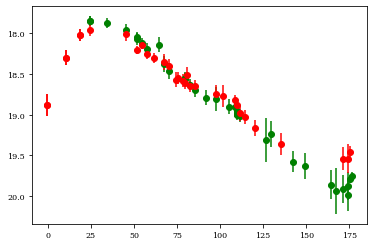

In [3]:
ztf = marshal_data[marshal_data["instrument"] == "P48+ZTF"]
det_mask = ztf["magpsf"] < 99.

for f in ["g", "r"]:
    
    mask = np.logical_and(
        det_mask,
        ztf["filter"] == f
    )

    plt.errorbar(ztf["mjd"][mask] - bran_disc.mjd, ztf["magpsf"][mask], yerr=ztf["sigmamagpsf"][mask], fmt="o", color=f)
plt.gca().invert_yaxis()

In [4]:
def rs(m):
    return ((2 * const.G * m)/const.c**2).to("cm")

In [5]:
rs(const.M_sun) * 10 ** 7

<Quantity 2.95325008e+12 cm>

In [6]:
ztf_p = photometry_data[np.array(["ZTF" in x for x in photometry_data["band"]])]
ztf_p = ztf_p[ztf_p["flux_Jy"] > 0.]
ztf_p = ztf_p.assign(mjd=(ztf_p["#day_since_peak"] + t_peak_mjd.mjd))
print(ztf_p)

     #day_since_peak   band   flux_Jy       nu_rest           lum  \
147         3.428177  g.ZTF  0.000204  6.665889e+14  1.113742e+43   
148        12.934550  g.ZTF  0.000199  6.665889e+14  1.087488e+43   
149        23.396710  g.ZTF  0.000184  6.665889e+14  1.006062e+43   
150        29.105120  g.ZTF  0.000165  6.665889e+14  9.051168e+42   
151        29.121480  g.ZTF  0.000170  6.665889e+14  9.284203e+42   
152        31.959380  g.ZTF  0.000158  6.665889e+14  8.627890e+42   
153        34.798140  g.ZTF  0.000149  6.665889e+14  8.152759e+42   
154        41.475170  g.ZTF  0.000155  6.665889e+14  8.492286e+42   
155        44.324300  g.ZTF  0.000124  6.665889e+14  6.802438e+42   
156        47.117390  g.ZTF  0.000115  6.665889e+14  6.313419e+42   
157        55.706240  g.ZTF  0.000107  6.665889e+14  5.834244e+42   
158        55.732120  g.ZTF  0.000105  6.665889e+14  5.755786e+42   
159        58.594750  g.ZTF  0.000099  6.665889e+14  5.409843e+42   
160        61.431890  g.ZTF  0.000

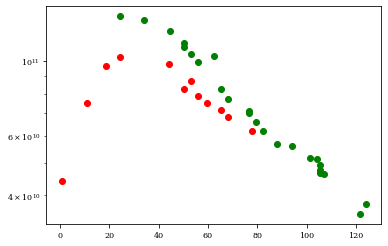

In [7]:
for f in ["g", "r"]:
    
    mask = ztf_p["band"] == f"{f}.ZTF"

    plt.errorbar(ztf_p["mjd"][mask] - bran_disc.mjd, ztf_p["flux_Jy"][mask]*ztf_p["nu_rest"][mask],fmt="o", color=f)
    
plt.yscale("log")

In [8]:
print(ztf_p["mjd"], ztf["mjd"])

147    58607.298177
148    58616.804550
149    58627.266710
150    58632.975120
151    58632.991480
152    58635.829380
153    58638.668140
154    58645.345170
155    58648.194300
156    58650.987390
157    58659.576240
158    58659.602120
159    58662.464750
160    58665.301890
161    58670.995190
162    58676.719510
163    58684.211510
164    58687.074150
165    58688.099830
166    58688.103260
167    58688.106680
168    58688.150160
169    58689.928030
170    58704.303700
171    58706.931700
205    58583.511270
206    58593.957519
207    58601.609536
208    58607.313062
209    58627.212090
210    58632.938490
211    58635.792280
212    58638.684780
213    58642.488150
214    58648.158620
215    58651.009550
216    58660.526960
Name: mjd, dtype: float64 0      58574.4859
1      58574.5250
2      58582.4648
3      58582.4648
4      58593.4459
          ...    
132    58757.2814
133    58758.1477
134    58758.1885
135    58758.2617
136    58759.1902
Name: mjd, Length: 85, dtype: float6

In [10]:
print(ztf[ztf["filter"]=="g"])

          # date         jdobs filter  absmag  magpsf  sigmamagpsf  limmag  \
1    2019 Apr 01  2.458575e+06      g   99.00   99.00        99.00   17.92   
8    2019 May 04  2.458608e+06      g  -18.90   17.85         0.06   20.92   
9    2019 May 04  2.458608e+06      g  -18.90   17.85         0.06   20.92   
12   2019 May 14  2.458618e+06      g  -18.87   17.87         0.06   20.84   
25   2019 May 25  2.458629e+06      g  -18.79   17.96         0.08   19.84   
33   2019 May 31  2.458635e+06      g  -18.67   18.07         0.07   20.87   
34   2019 May 31  2.458635e+06      g  -18.70   18.04         0.06   20.28   
37   2019 Jun 03  2.458638e+06      g  -18.62   18.12         0.06   21.05   
39   2019 Jun 06  2.458641e+06      g  -18.56   18.19         0.07   20.86   
44   2019 Jun 13  2.458648e+06      g  -18.60   18.14         0.09   20.32   
47   2019 Jun 16  2.458651e+06      g  -18.36   18.38         0.10   19.74   
52   2019 Jun 19  2.458654e+06      g  -18.28   18.46         0.

In [ ]:
plt.plot()